# C 5.0 

In [ ]:
#Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Iris.csv', 
                 index_col=0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [3]:
x = df.iloc[:,:-1]
y = df['Species']

In [4]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [5]:
dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Model Evaluation

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
print(classification_report(ytest,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [8]:
confusion_matrix(ytest,ypred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [9]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.9666666666666667


In [11]:
x.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

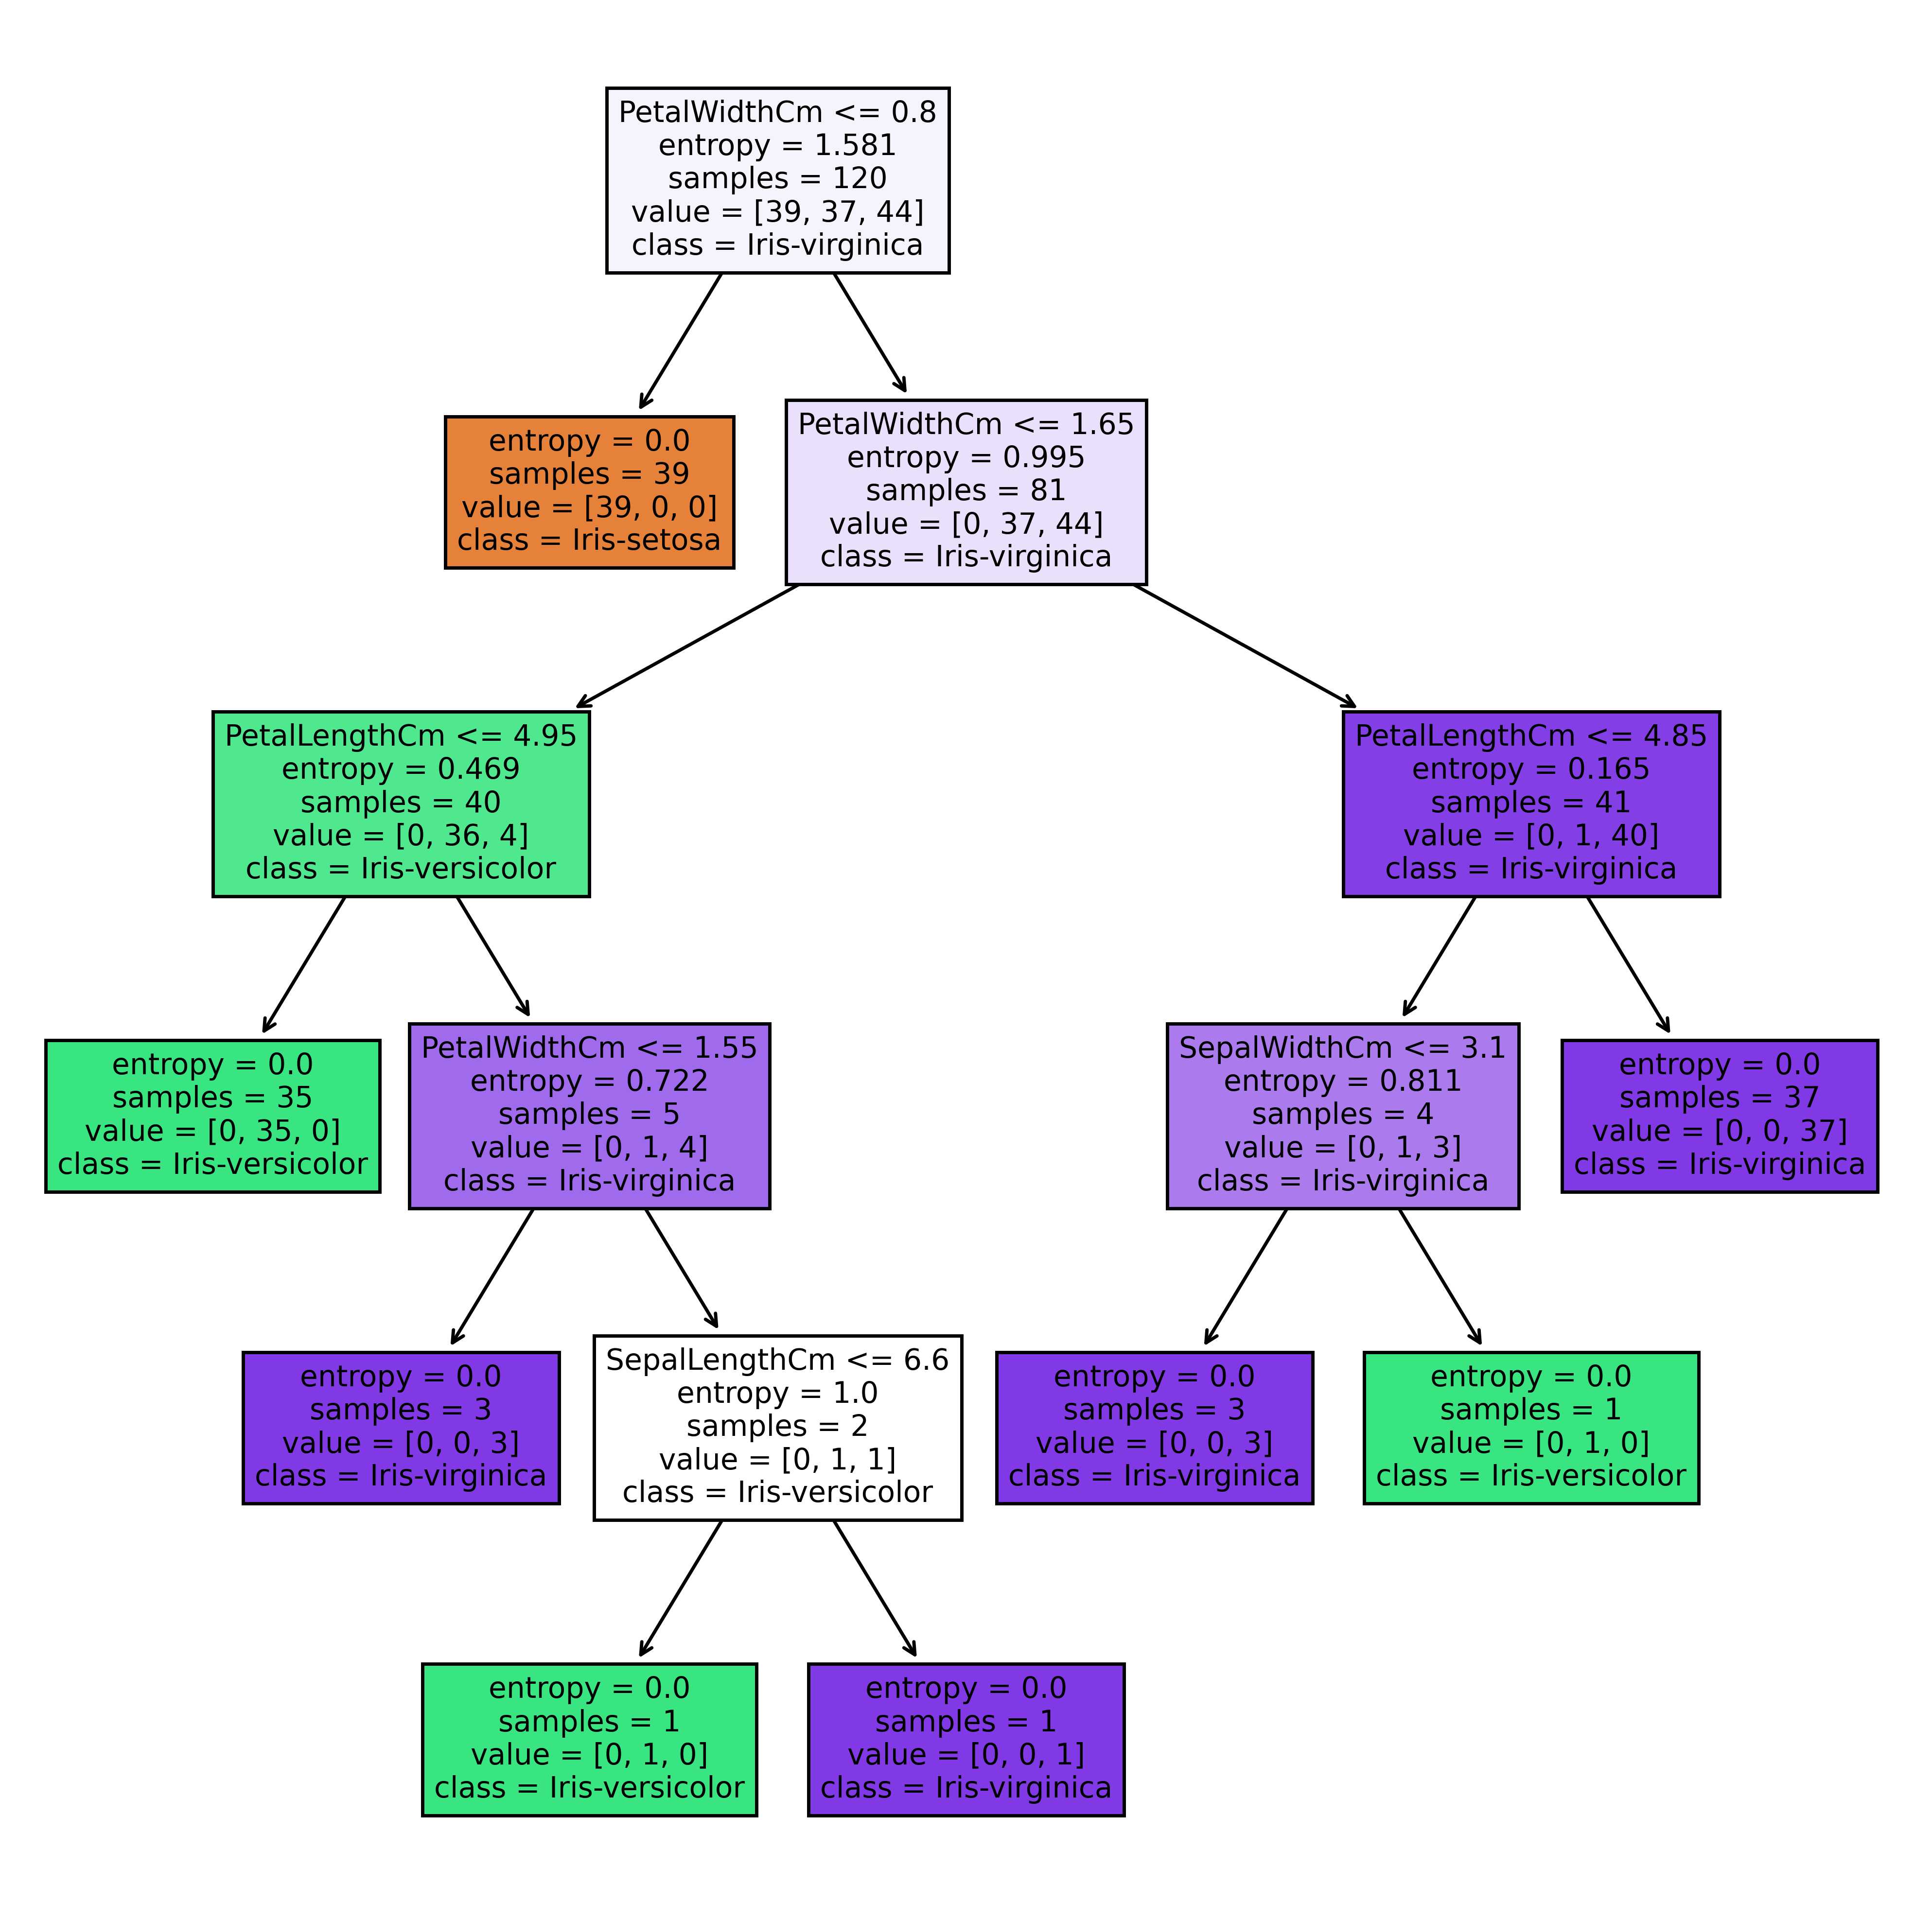

In [14]:
tree.plot_tree(dt, feature_names=x.columns,class_names=df['Species'].unique(),
              filled=True)
plt.show()

In [15]:
dt.feature_importances_ #It return information gain of all columns

array([0.01054122, 0.01710372, 0.09849491, 0.87386016])

In [16]:
x.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

# CART

<code>CLASSIFICATION</CODE>

In [17]:
dtc = DecisionTreeClassifier(criterion='gini')

In [18]:
dtc.fit(xtrain,ytrain)
ypred = dtc.predict(xtest)

In [19]:
print(classification_report(ytest,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [20]:
dtc.score(xtrain,ytrain), dtc.score(xtest,ytest)

(1.0, 0.9666666666666667)

# Regression

In [21]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
x = df.iloc[:,:3]
y = df['PetalWidthCm']

In [23]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm
Id,,,
1,5.1,3.5,1.4
2,4.9,3.0,1.4
3,4.7,3.2,1.3
4,4.6,3.1,1.5
5,5.0,3.6,1.4
...,...,...,...
146,6.7,3.0,5.2
147,6.3,2.5,5.0
148,6.5,3.0,5.2


In [24]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=42)

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
dtr = DecisionTreeRegressor()

dtr.fit(xtrain,ytrain)
yp = dtr.predict(xtest)
yp

array([1.4, 0.4, 1.4, 1.5, 1.5, 0.2, 1. , 1.5, 1.7, 1.2, 1.8, 0.2, 0.2,
       0.1, 0.4, 1.5, 1.8, 1.4, 1.5, 1.8, 0.2, 1.8, 0.2, 1.8, 2.2, 2.1,
       1.4, 2.3, 0.2, 0.2, 0.3, 0.2, 1.4, 0.2, 0.2, 1.5, 1.5, 0.2, 0.3,
       0.2, 1.9, 1.5, 1.3, 0.2, 0.2])

In [27]:
dtr.score(xtrain,ytrain), dtr.score(xtest,ytest)

(0.998523988291134, 0.8987712929349344)

In [ ]:
x.columns

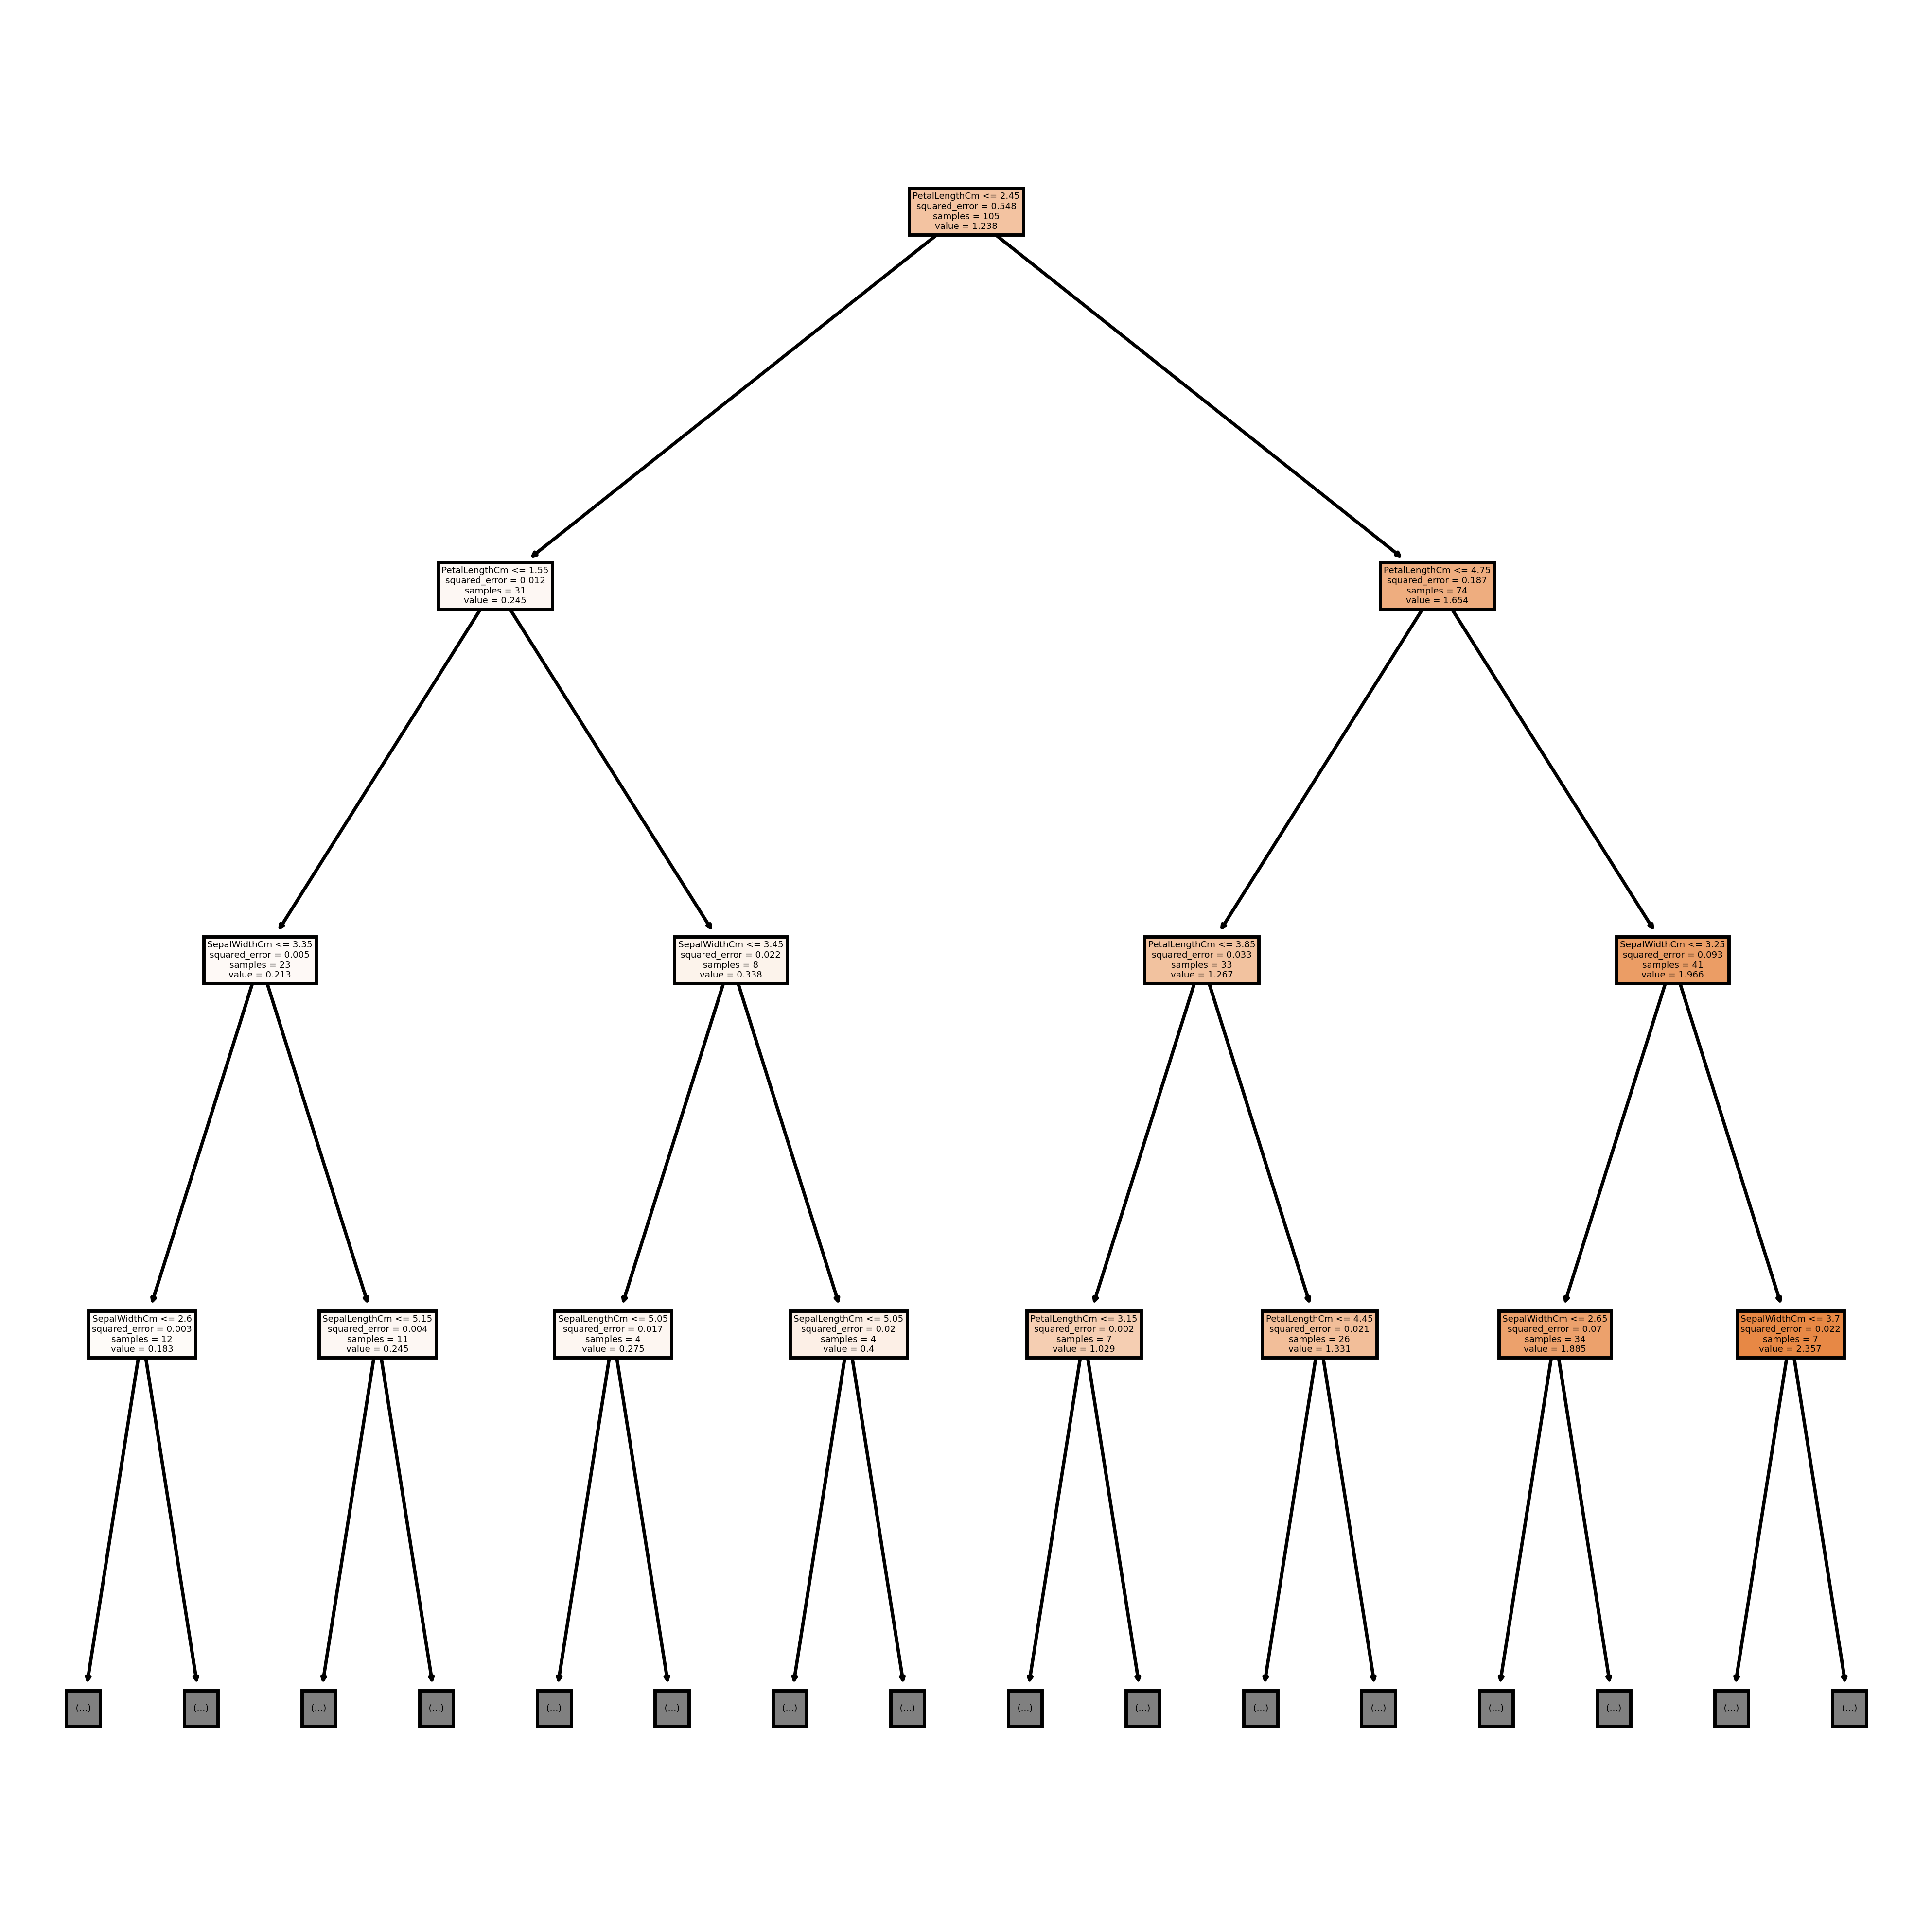

In [28]:
tree.plot_tree(dtr, feature_names=x.columns,max_depth=3, filled=True)
plt.show()

# Hyperparameter tuning

In [ ]:
DecisionTreeRegressor()

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
params = {
    'criterion' : ['squared_error','absolute_error'],
    'max_depth' : [3,5,7,9,11],
    'splitter' :['best','random']
}

In [33]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params,
                   verbose=2)

In [34]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END criterion=squared_error, max_depth=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'splitter': ['best', 'random']},
             verbose=2)

In [35]:
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 3, 'splitter': 'best'}

In [36]:
dtr = DecisionTreeRegressor(criterion='squared_error',
                           max_depth=3,splitter='best')

In [37]:
dtr.fit(xtrain,ytrain)
ypred  = dtr.predict(xtest)

In [38]:
dtr.score(xtrain,ytrain),dtr.score(xtest,ytest)

(0.9419858001628175, 0.9327669485234616)

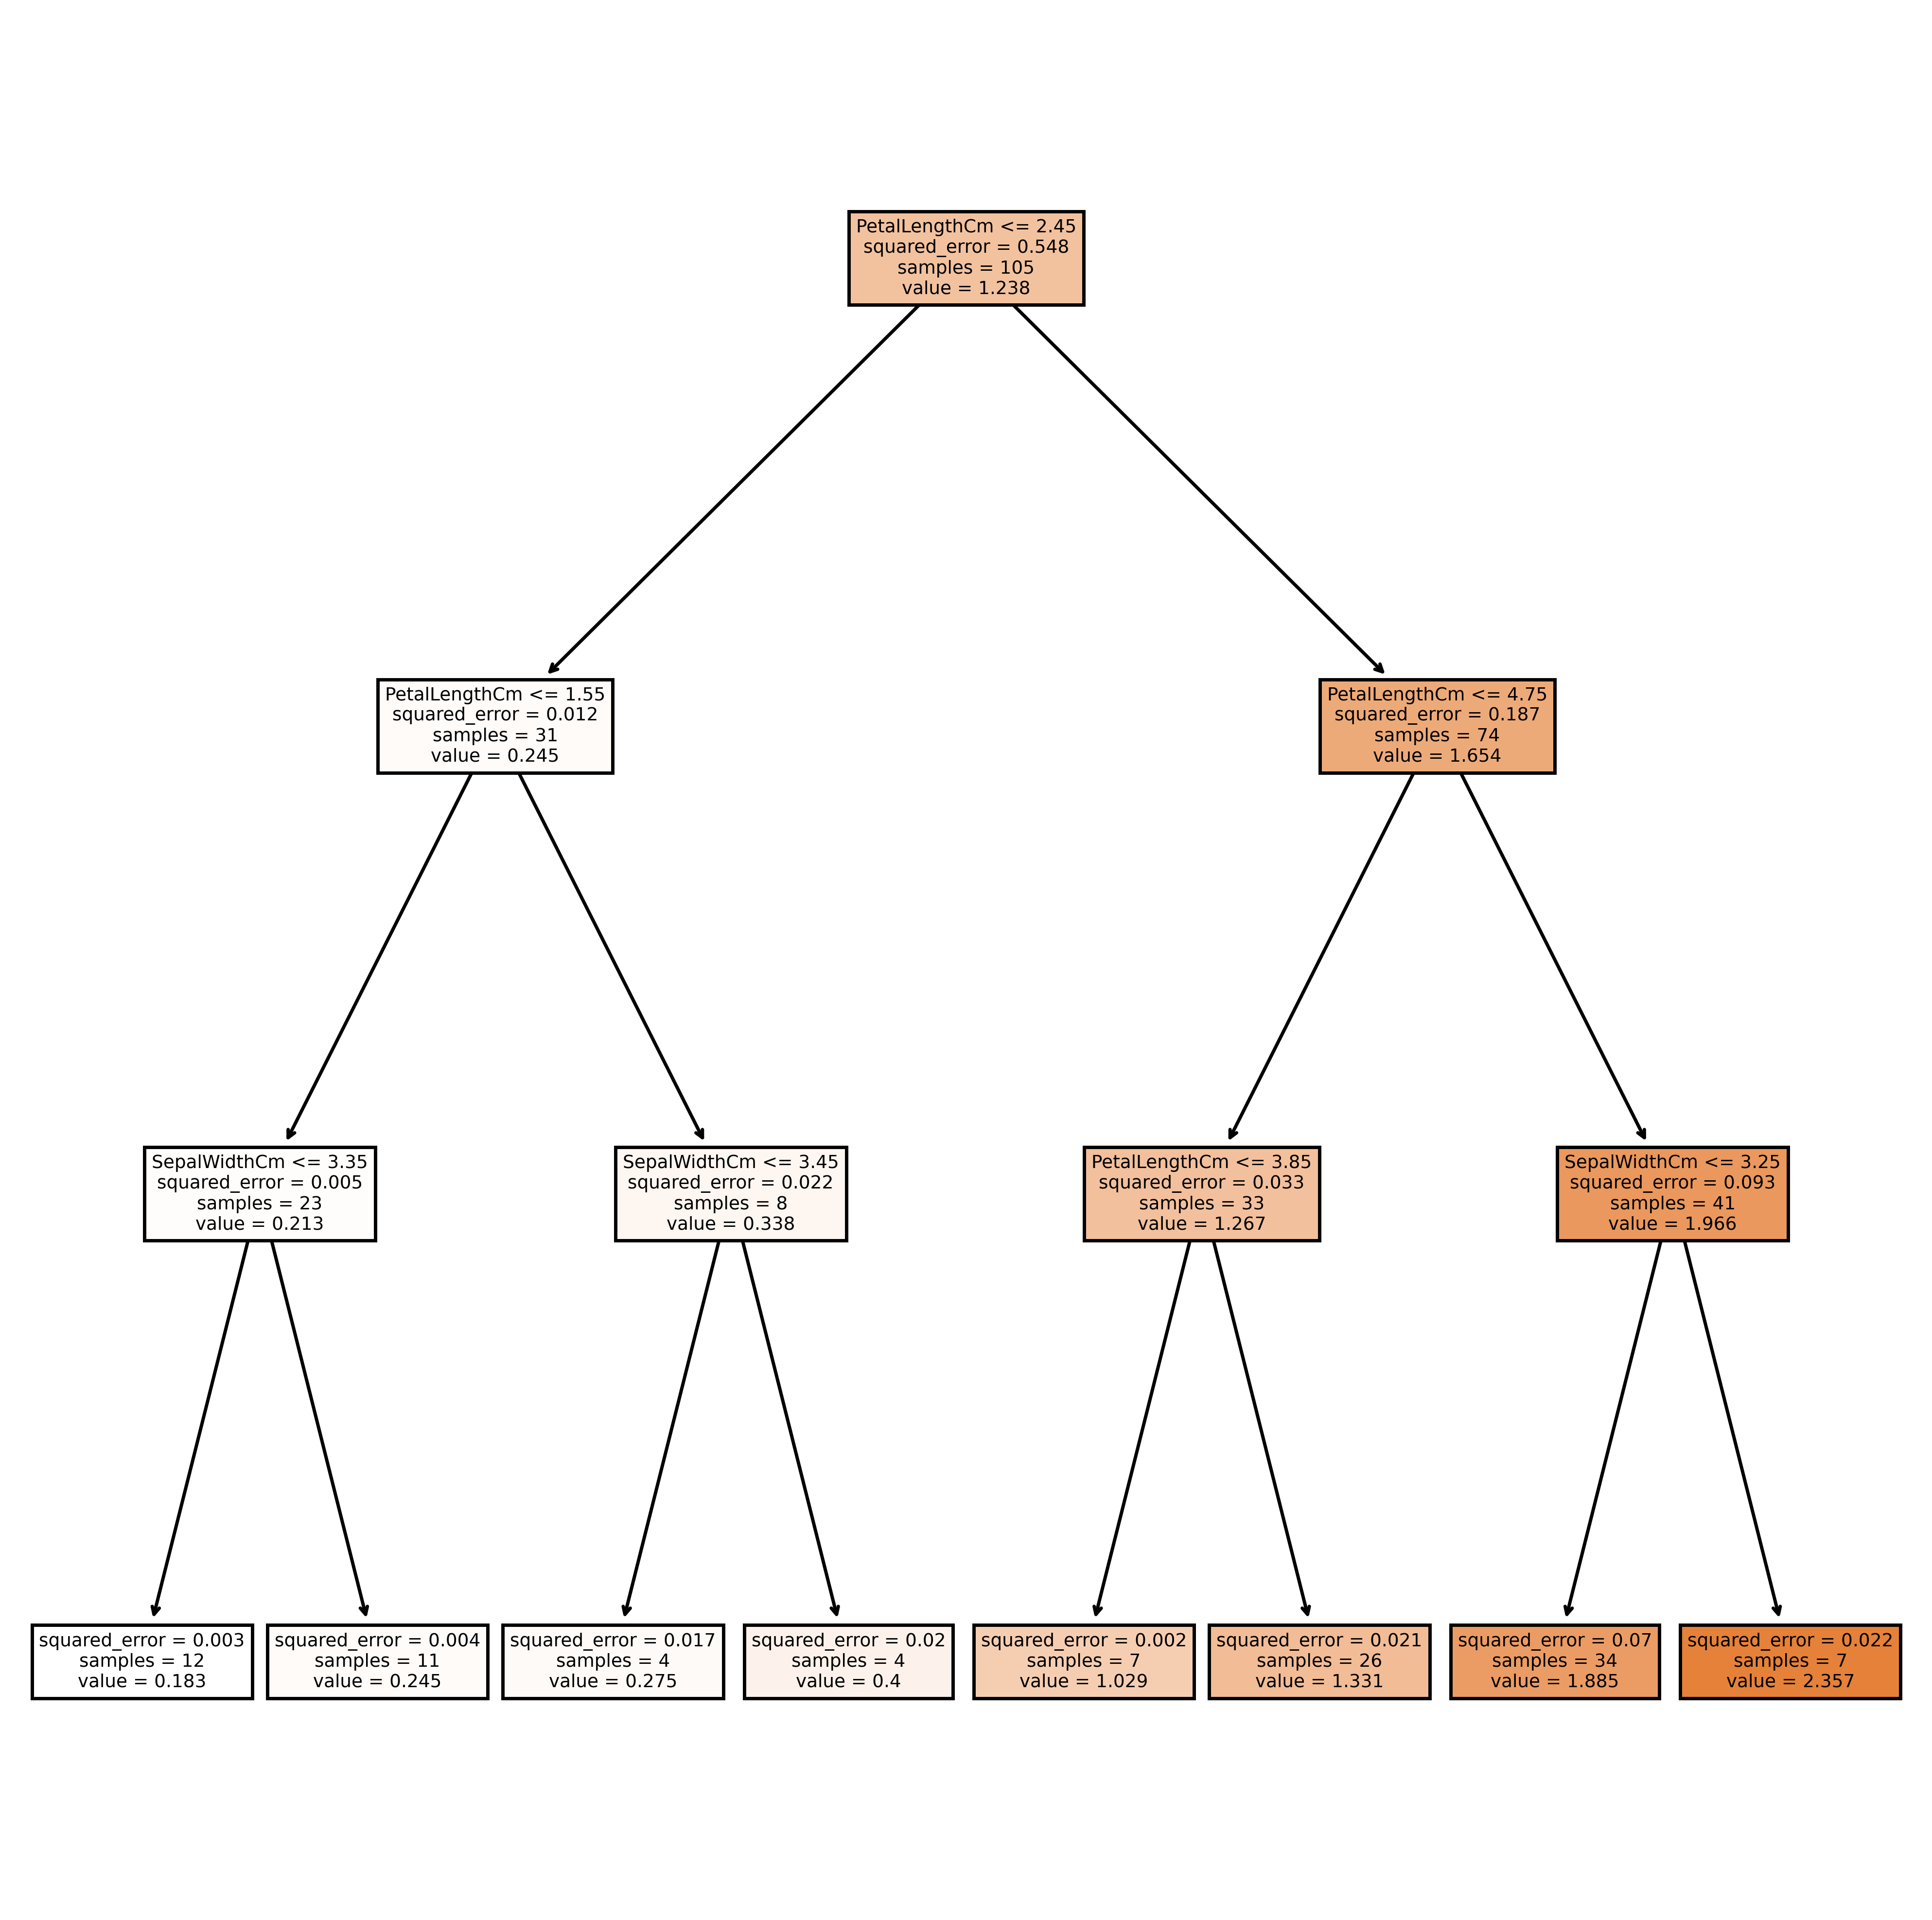

In [39]:
tree.plot_tree(dtr, feature_names=x.columns,filled=True)
plt.show()